# Reweighting techniques

## Ex 12.1 Change of measure

For a canonical distribution $\pi$ at inverse temperature $\beta$, prove the second equality of 
$$
\langle O \rangle_{\pi} = \biggr \langle O \frac{\pi}{g} \biggr \rangle_{g} = \frac{\biggr \langle O \frac{e^{-\beta E}}{g} \biggr \rangle_{g}}{\biggr \langle \frac{e^{-\beta E}}{g} \biggr \rangle_{g}}
$$
where $g$ is another probability distribution function.

We can demonstrate the equality by simply applying reweighting with $\pi(C) = \frac{e^{-\beta E(C)}}{\sum_{C'} e^{-\beta E(C')}}$:

$$
\begin{align}
\langle O \rangle_{\pi} &= \sum_C O(C) \frac{e^{-\beta E(C)}}{\sum_{C'} e^{-\beta E(C')}} = \left[ \sum_C O(C) \frac{e^{-\beta E(C)}}{g(C)} g(C) \right] \left[ \sum_{C'} e^{-\beta E(C')} \right]^{-1} \\
&= \left\langle O(C) \frac{e^{-\beta E(C)}}{g(C)} \right\rangle_{g} \left\langle \sum_{C'} e^{-\beta E(C')} \frac{g(C')}{g(C')} \right\rangle^{-1} = \frac{\left\langle O \frac{e^{-\beta E}}{g} \right\rangle_{g}}{\left\langle \frac{e^{-\beta E}}{g} \right\rangle_{g}}
\end{align}
$$

If we consider, as in the umbrella sampling, $g(C) =  \frac{e^{-\beta[E(C)+U(C)]}}{\sum_{C'} e^{-\beta [E(C')+U(C')]}}$

$$
\begin{align}
\langle O \rangle_{\pi} &= \left[ \sum_C O(C) \frac{e^{-\beta E(C)}}{e^{-\beta[E(C)+U(C)]}} \sum_{C'} e^{-\beta [E(C')+U(C')]} g(C) \right] \left[ \sum_C \frac{e^{-\beta E(C)}}{e^{-\beta[E(C)+U(C)]}} \sum_{C'} e^{-\beta [E(C')+U(C')]} g(C) \right]^{-1} = \\
&= \left[ \sum_C O(C) e^{\beta U(C)} g(C) \right] \left[ \sum_C e^{\beta U(C)} g(C) \right]^{-1} \frac{\sum_{C'} e^{-\beta [E(C')+U(C')]}}{\sum_{C'} e^{-\beta [E(C')+U(C')]}} = \frac{\langle O e^{\beta U(C)} \rangle_{g}}{\langle e^{\beta U(C)} \rangle_{g}}
\end{align}
$$


## Ex.12.2 Exercise: Single Histogram Method

* Choose a system, for example, the two-dimensional Ising model, and run $K ≥ 3$ simulations at different temperatures, collecting data on the energy of samples.
* Apply the single histogram method to extrapolate the average internal energy $U(\beta) = \langle E \rangle_\beta$ from data at one $\beta_i$ to a range of $\beta$ covering the selected $\beta_1, ... , \beta_K$ (i.e., here ignore the data from $\beta_k \neq \beta_i$).
* Comment on the overlap between this prediction and the usual evaluation of the internal energy $U(\beta_k)$ obtained directly from data at $\beta_K$.
* Is the extrapolated $U$ getting worse when $\beta$ departs too much from $\beta_i$?
* How does the prediction $U(\beta)$ change with the $\beta_i$?

In [1]:
from load_data import load_from_file, get_collection
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

energies = load_from_file("energies.txt")
T_C = 2/np.log(1+np.sqrt(2))
T_max = T_C * 1.25
T_min = T_C * 0.75
step = (T_max - T_min) / 2
T_values = []
for i in range(3):
    T_values.append(T_min + i * step)

Text(0, 0.5, 'pdf')

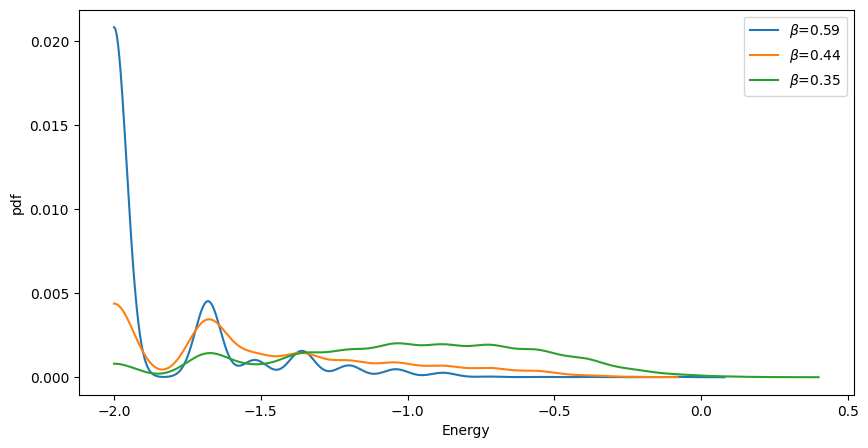

In [18]:
# check the pdf of the energies
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
for i, T in enumerate(T_values):
    e = get_collection(energies, np.around(T,2), 5)
    # Generate a PDF
    kde = gaussian_kde(e, bw_method='scott')  
    x_vals = np.linspace(min(e), max(e), 1000)
    pdf_vals = kde(x_vals)
    ax.plot(x_vals, pdf_vals/sum(pdf_vals), label=r"$\beta$={:.2f}".format(1/T))
ax.legend()
ax.set_xlabel("Energy")
ax.set_ylabel("pdf")

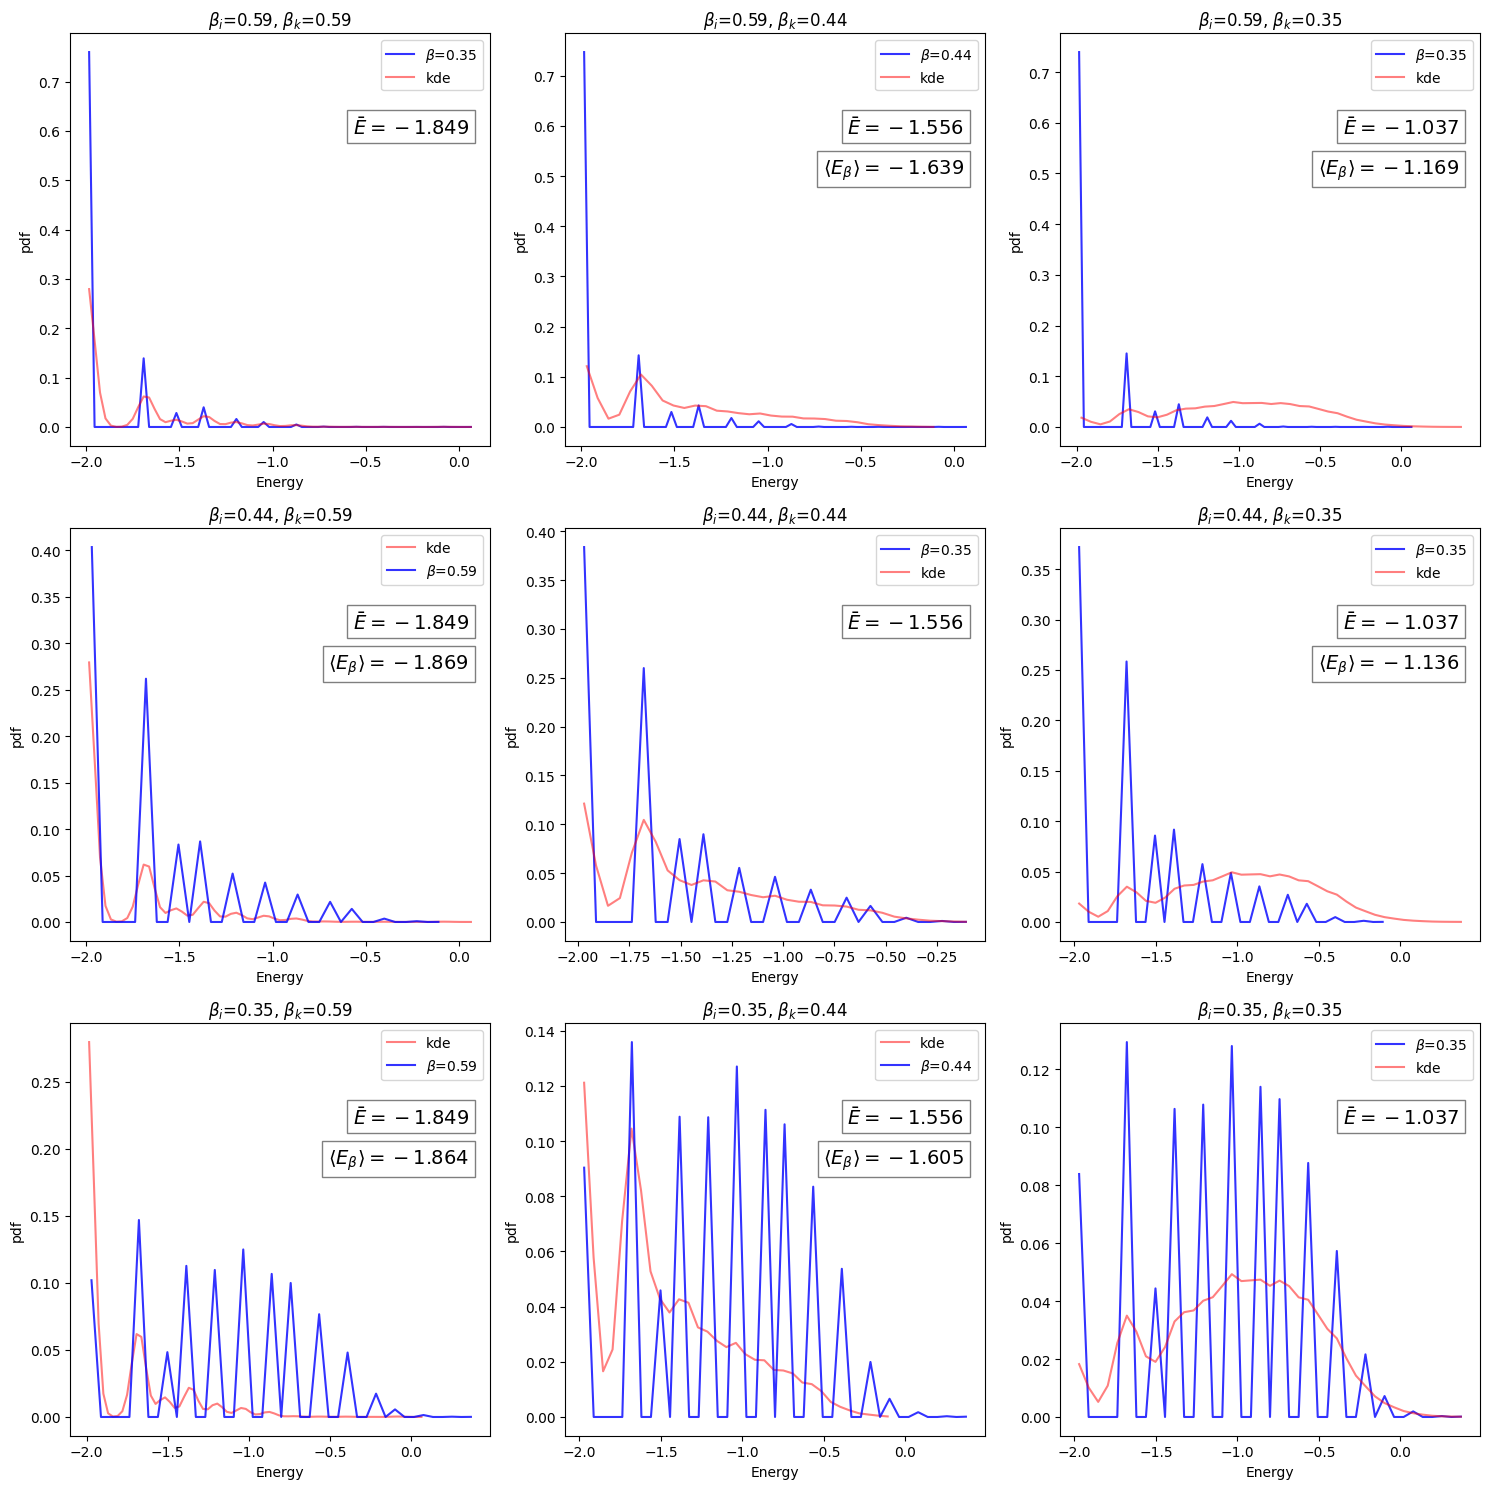

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

new_mean = np.zeros(shape=(3,3))
simple_mean = np.zeros(shape=(3,3))

for i, T in enumerate(T_values):
    e = get_collection(energies, np.around(T, 2), 5)
    simple_avgE = np.mean(e)
    
    # Estimate energy distribution using histogram method, using current distribution as the sampling one
    
    # 1. Find the probability distribution of energies using histograms
    # N_E represents the number of states at a specific energy
    N_E, bins = np.histogram(e, bins='auto', density=True)  # Using 'auto' to let numpy decide on optimal binning
    
    # Midpoint of bins
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    
    # 2. Calculate the histogram-based energy distribution at the current temperature
    h_E = N_E * np.exp(-bin_centers / T)
    ax[i][i].plot(bin_centers, h_E / np.sum(h_E), label=r"$\beta$={:.2f}".format(1 / T_values[j]), alpha=0.8, color="blue")
    ax[i][i].set_title(r"$\beta_i$={:.2f}, $\beta_k$={:.2f}".format(1/T, 1/T))
    
    for j in range(3):
        if j != i:
            # Reweight the distribution to temperature T_values[j]
            reweight_factor = np.exp(-bin_centers * (1 / T_values[j] - 1 / T))
            h_Ej = h_E * reweight_factor
            avgE = np.sum(bin_centers * h_Ej) / np.sum(h_Ej)
            ax[i][j].plot(bin_centers, h_Ej / np.sum(h_Ej), label=r"$\beta$={:.2f}".format(1 / T_values[j]), alpha=0.8, color="blue")
            ax[i][j].set_title(r"$\beta_i$={:.2f}, $\beta_k$={:.2f}".format(1 / T, 1/T_values[j]))
            # save and plot new average value
            new_mean[i][j] = avgE
            textstr = r"$\langle E_\beta \rangle={:.3f}$".format(avgE)
            ax[j][i].text(0.95, 0.7, textstr, transform=ax[j][i].transAxes, fontsize=14, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
            
            
    # Estimate the true PDF of the energies using KDE
    kde = gaussian_kde(e, bw_method='scott')
    pdf_vals = kde(bin_centers)
    
    # Plot this distribution in all the figures in the same column
    for j in range(3):
        ax[j][i].plot(bin_centers, pdf_vals / np.sum(pdf_vals), label="kde", alpha=0.5, color="red")
        
        # save and plot simple average E 
        simple_mean[j][i] = simple_avgE
        textstr = r"$\bar{{E}}={:.3f}$".format(simple_avgE)
        ax[j][i].text(0.95, 0.8, textstr, transform=ax[j][i].transAxes, fontsize=14, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
            
# Add labels, legends, and finalize the plots
for i in range(3):
    for j in range(3):
        ax[i][j].legend()
        ax[i][j].set_xlabel("Energy")
        ax[i][j].set_ylabel("pdf")

plt.tight_layout()
plt.show()


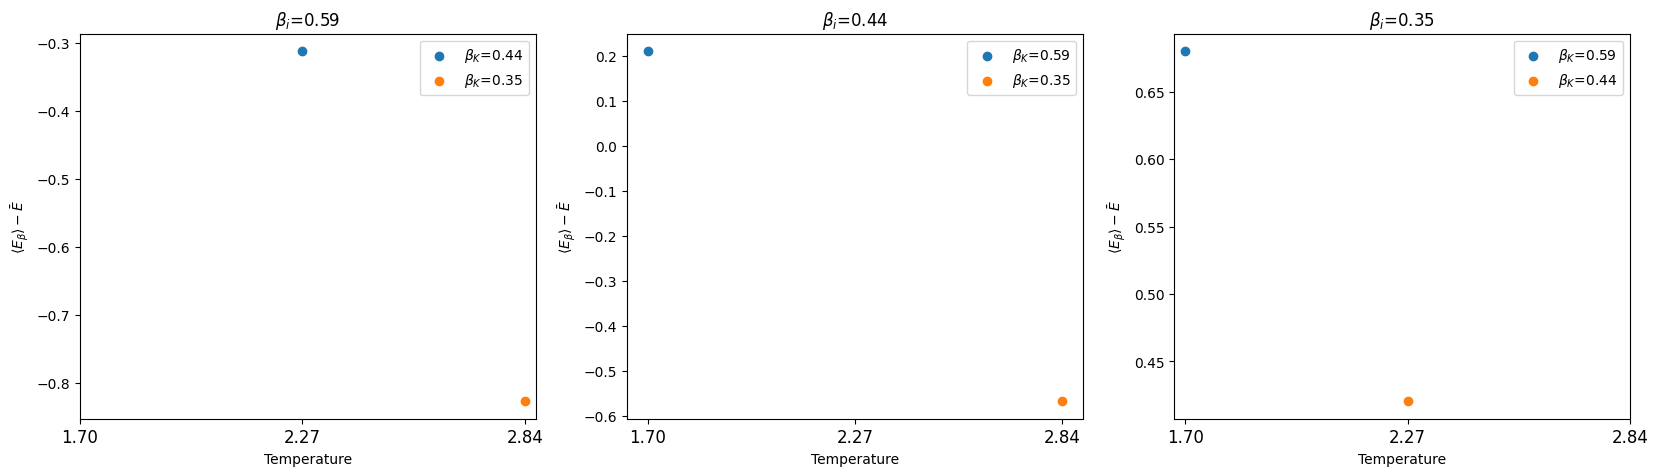

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i, Ti in enumerate(T_values):
    for k, Tk in enumerate(T_values):
        if i != k:
            diff = new_mean[i][k] - simple_mean[i][k]
            ax[i].scatter(k, diff, label=r"$\beta_K$={:.2f}".format(1/Tk))
    ax[i].set_xticks(np.arange(len(T_values)))  # Positions for the ticks
    ax[i].set_xticklabels([f"{T:.2f}" for T in T_values], fontsize=12)
    ax[i].set_xlabel("Temperature")
    ax[i].set_ylabel(r"$\langle E_\beta \rangle - \bar{E}$")
    ax[i].legend()
    ax[i].set_title(r"$\beta_i$={:.2f}".format(1/Ti))

## Ex. 12.3

In [29]:
# the dictionary "energies" contains the list of energies for M = 10001, L=5, N_temperatures = 10, ranging from T_C/2 to 2*T_C
energies = load_from_file("energies_3.txt")
T_C = 2/np.log(1+np.sqrt(2))
T_max = T_C * 2
T_min = T_C / 2

# Number of temperatures
N_temp = 7
step = (T_max - T_min) / (N_temp - 1)

# Temperature values
T_values = np.array([T_min + i * step for i in range(N_temp)])

# betas values
beta_values = 1/T_values

In [30]:
[get_collection(energies, np.around(T, 2), 5) for T in T_values], [np.around(T, 2) for T in T_values]

([array([ 0.08,  0.08,  0.08, ..., -2.  , -2.  , -2.  ]),
  array([-0.24, -0.24, -0.4 , ..., -2.  , -2.  , -2.  ]),
  array([ 0.08,  0.08,  0.08, ..., -1.36, -1.36, -1.36]),
  array([ 0.08,  0.08, -0.08, ..., -1.04, -1.04, -1.04]),
  array([ 0.08,  0.24,  0.24, ..., -0.4 , -0.24, -0.24]),
  array([ 0.24,  0.24,  0.24, ..., -0.08, -0.24, -0.24]),
  array([ 0.08, -0.08, -0.24, ..., -0.24, -0.24, -0.24])],
 [1.13, 1.7, 2.27, 2.84, 3.4, 3.97, 4.54])

In [36]:
from tqdm import tqdm

# Utility functions
def rescale(Z):
    # Rescale all Zs by a common factor
    A = 1 / np.sqrt(np.min(Z) * np.max(Z))
    return np.array(A * Z)

def control(Z, Z_prev):
    # Function to check convergence
    return np.sum(((Z - Z_prev) / Z) ** 2)

'''def long_sum_trick(M, Z, betas, E_i, k, n):
    q = np.random.randint(0,M.shape[0])
    a = np.log(M[q]/Z[q]) + E_i[n] * (betas[k] - betas[q])
    trick_sum = np.sum(np.exp(np.log((M * Z[q])/(Z * M[q])) + (betas[q] - betas) * E_i[n]))
    return 1 / (np.exp(a) * trick_sum)'''

def long_sum_trick(M, Z, betas, E_i, k):
    q = np.random.randint(0, M.shape[0])  # Randomly pick an index q
    a = np.log(M[q] / Z[q]) + E_i * (betas[k] - betas[q])  # Vectorized `a`
    
    # Vectorized computation of the summation
    trick_sum = np.sum(np.exp(np.log((M * Z[q]) / (Z * M[q])) + (betas[q] - betas) * E_i[:, np.newaxis]), axis=1)
    
    # Return the vectorized result
    return np.sum(1 / (np.exp(a) * trick_sum))

def Z_k(energies, T_values, betas):
    # function to compute partition Z_k
    # collect the simulation energies in a list
    E = np.array([get_collection(energies, np.around(T, 2), 5) for T in T_values])

    # collect the lengths of the simulations
    M = np.array([e.shape[0] for e in E])
    
    # initialize partition array
    Z = np.ones(len(T_values))
    
    # define a number of iterations
    n_iters = 10**3
    
    # define control parameter
    epsilon = 10**(-7)
    
    for iter in tqdm(range(n_iters)):
        Z_prev = Z.copy()
        for k, Tk in enumerate(T_values):
            Z[k] = sum([long_sum_trick(M, Z, betas, E[i], k) for i, Ti in enumerate(T_values)])
            
        Z = rescale(Z)  # Rescale Z to prevent numerical instability
    
        if control(Z, Z_prev) < epsilon**2:
            print(f"Convergence reached at iteration {iter}")
            break
    return Z, E, M

def long_sum_trick2(M, Z, betas, betas_new, E_i, k):
    q = np.random.randint(0, M.shape[0])  # Randomly pick an index q
    a = np.log(M[q] / Z[q]) + E_i * (betas_new[k] - betas[q])  # Vectorized `a`
    
    # Vectorized computation of the summation
    trick_sum = np.sum(np.exp(np.log((M * Z[q]) / (Z * M[q])) + (betas[q] - betas) * E_i[:, np.newaxis]), axis=1)
    
    # Return the vectorized result
    return np.sum(1 / (np.exp(a) * trick_sum))

# compute Z(beta)
def zeta_b(T_values, T_values_new, E, M, Z, betas, betas_new):
    
    Z_beta = np.zeros(shape=(len(T_values_new), 1))
                 
    for k, Tk in enumerate(T_values_new):
        Z_beta[k] = sum([long_sum_trick2(M, Z, betas, betas_new, E[i], k) for i, Ti in enumerate(T_values)]) 
        
    return Z_beta

def long_sum_trick3(M, Z, betas, betas_new, E_i, k):
    q = np.random.randint(0, M.shape[0])  # Randomly pick an index q
    a = np.log(M[q] / Z[q]) + E_i * (betas_new[k] - betas[q])  # Vectorized `a`
    
    # Vectorized computation of the summation
    trick_sum = np.sum(np.exp(np.log((M * Z[q]) / (Z * M[q])) + (betas[q] - betas) * E_i[:, np.newaxis]), axis=1)
    
    # Return the vectorized result
    return np.sum(E_i / (np.exp(a) * trick_sum))

# compute internal energy
def U_b(T_values, T_values_new, E, M, Z, betas, betas_new):

    Z_beta = zeta_b(T_values, T_values_new, E, M, Z, betas, betas_new)
    print(Z_beta.shape)
    
    U_beta = np.zeros(shape=(len(T_values_new), 1))
                 
    for k, Tk in enumerate(T_values_new):
        U_beta[k] = sum([long_sum_trick3(M, Z, betas, betas_new, E[i], k) for i, Ti in enumerate(T_values)])  
        
    return U_beta/Z_beta

In [37]:
Z, E, M = Z_k(energies, T_values, beta_values)
Z

  1%|          | 9/1000 [00:01<02:49,  5.84it/s]

Convergence reached at iteration 9


array([1.49962496, 1.02171795, 0.85524696, 0.77221597, 0.72277418,
       0.69005555, 0.66683339])

In [38]:
Z.shape

(7,)

(50, 1)


Text(0.5, 0, '$T$')

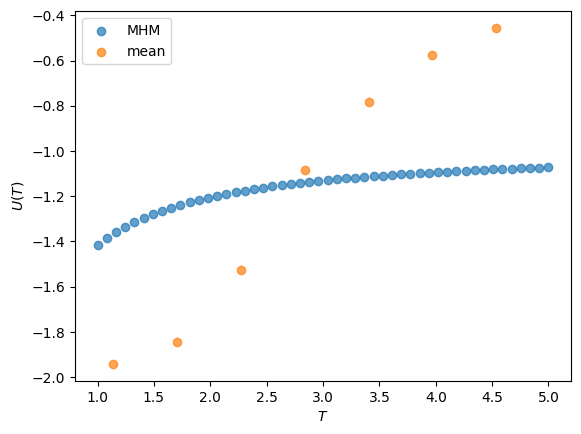

In [39]:
# define temperature space
T_space = np.linspace(1, 5, 50)
beta_space = 1/T_space

# list to store the values of E
E_MHM = U_b(T_values, T_space, E, M, Z, beta_values, beta_space)

# confront with average E
E_avg = np.mean(E, axis = 1)

plt.scatter(T_space, E_MHM, label="MHM", alpha=0.7)
plt.scatter(T_values, E_avg, label="mean", alpha=0.7)
plt.legend()
plt.ylabel(r"$U(T)$")
plt.xlabel(r"$T$")

In [ ]:
# in order to compute the CV we need to set up <E^2>
# compute internal energy
def U2_b(T_values, E, M, Z, betas):
    sum_over_all_samples = 0
    for i, Ti in enumerate(T_values):
        E_i = E[i]
        sum_over_n = sum([E_i[n]**2/np.sum(M * (1/Z) * np.exp((betas[k]-betas)*E_i[n])) for n in range(E_i.shape[0])])
        sum_over_all_samples += sum_over_n
    return sum_over_all_samples/Z_beta(T_values, E, M, Z, betas)

In [ ]:
#redo all the computations for different Ls
def C_V(E,E2, beta):
    return (E2-E**2)/(beta**2)